In [103]:
import pandas as pd
import numpy as np

In [104]:
from keras.preprocessing import sequence

In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Embedding

In [106]:
import matplotlib.pyplot as plt

In [107]:
x_train = np.array(pd.read_csv('./trajectory/twelve_trajectory.csv', header=None))
x_train.shape

(504, 3)

In [108]:
y_train = np.array(pd.read_csv('./trajectory/twelve_ytrain.csv', header=None))
y_train.shape

(12, 3)

In [109]:
x_max = max(x_train[:,0])
x_min = min(x_train[:,0])
y_max = max(x_train[:,1])
y_min = min(x_train[:,1])
z_max = max(x_train[:,2])
z_min = min(x_train[:,2])
print(x_min, x_max, y_min, y_max, z_min, z_max)

0 96 -19 278 0 56


In [110]:
x_train = x_train.reshape(12, 126)

In [111]:
n_classes = 3

In [112]:
model = Sequential()
model.add(Embedding(1000, 3, input_length=126))
model.add(LSTM(units=128, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=64, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=32, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=16, activation='tanh', unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 126, 3)            3000      
_________________________________________________________________
lstm_13 (LSTM)               (None, 126, 128)          67584     
_________________________________________________________________
lstm_14 (LSTM)               (None, 126, 64)           49408     
_________________________________________________________________
lstm_15 (LSTM)               (None, 126, 32)           12416     
_________________________________________________________________
lstm_16 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 135,595
Trainable params: 135,595
Non-trainable params: 0
_________________________________________________________________


In [114]:
batch_size = 6
training_iters = 80
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters)

Epoch 1/80
12/12 [==============================] - 124s 10s/step - loss: 1.1006 - acc: 0.2500
Epoch 2/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0982 - acc: 0.1667
Epoch 3/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0979 - acc: 0.3333
Epoch 4/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0963 - acc: 0.3333
Epoch 5/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0932 - acc: 0.5000
Epoch 6/80
12/12 [==============================] - 0s 38ms/step - loss: 1.0913 - acc: 0.5000
Epoch 7/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0804 - acc: 0.5000
Epoch 8/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0629 - acc: 0.5000
Epoch 9/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0080 - acc: 0.5833
Epoch 10/80
12/12 [==============================] - 0s 37ms/step - loss: 1.0255 - acc: 0.5833
Epoch 11/80
12/12 [==============================] - 0s 38

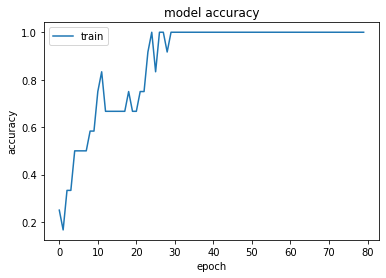

In [115]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

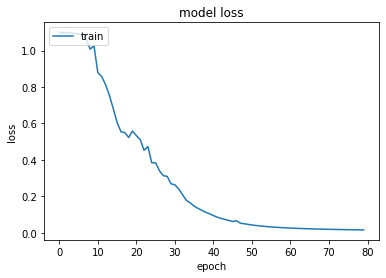

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
vali = model.predict(x_train)
print("training up:\n", vali[0:4,:])
print("training right:\n", vali[4:8,:])
print("training down:\n", vali[8:12,:])

training up:
 [[0.98603696 0.00309041 0.01087269]
 [0.9859557  0.00313333 0.01091084]
 [0.9861113  0.00305179 0.0108369 ]
 [0.9858336  0.00319308 0.01097342]]
training right:
 [[0.00450649 0.99331313 0.00218036]
 [0.00492169 0.9909322  0.00414606]
 [0.00631975 0.9876721  0.00600814]
 [0.00793274 0.9850818  0.00698544]]
training down:
 [[0.02033814 0.00225268 0.9774091 ]
 [0.02034337 0.00225134 0.97740525]
 [0.02034023 0.00225185 0.9774079 ]
 [0.0203551  0.00224934 0.9773956 ]]


In [180]:
#model.save('./saved model/classifierEmbedding_98_99_97.h5')

In [198]:
maxlen = 42*3

up_test = np.array(pd.read_csv('./trajectory/up_len37_2.csv'))
right_test = np.array(pd.read_csv('./trajectory/right_len38.csv'))
down_test = np.array(pd.read_csv('./trajectory/down_len38.csv'))

#35
#38
#38

up_test1 = up_test
right_test1 = right_test
down_test1 = down_test

up_test1 = np.reshape(up_test1,(1,up_test1.shape[0]*up_test1.shape[1]))
right_test1 = np.reshape(right_test1,(1,right_test1.shape[0]*right_test1.shape[1]))
down_test1 = np.reshape(down_test1,(1,down_test1.shape[0]*down_test1.shape[1]))

up_test1 = sequence.pad_sequences(up_test1, maxlen=maxlen, padding='post')
right_test1 = sequence.pad_sequences(right_test1, maxlen=maxlen, padding='post')
down_test1 = sequence.pad_sequences(down_test1, maxlen=maxlen, padding='post')

#up_test = np.reshape(up_test,(int(up_test.shape[1]/3),3))
#right_test = np.reshape(right_test,(int(right_test.shape[1]/3),3))
#down_test = np.reshape(down_test,(int(down_test.shape[1]/3),3))
right_test1.shape

(1, 126)

In [199]:
# 80epoch
pred_up = model.predict(up_test1)
pred_right = model.predict(right_test1)
pred_down = model.predict(down_test1)

np.set_printoptions(suppress=True)
print(pred_up)
print(pred_right)
print(pred_down)

[[0.9861113 0.0030518 0.0108369]]
[[0.00492169 0.9909322  0.00414606]]
[[0.02041701 0.00225192 0.97733104]]


In [200]:
## top spin
for i in range(3,91,3):
    up_test5 = up_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")

number of balls = 1 , probability = [[0.9601517  0.00264558 0.03720275]]
top spin
number of balls = 2 , probability = [[0.96019024 0.00264108 0.03716857]]
top spin
number of balls = 3 , probability = [[0.9601974  0.0026408  0.03716181]]
top spin
number of balls = 4 , probability = [[0.9602065  0.00264052 0.037153  ]]
top spin
number of balls = 5 , probability = [[0.9602233  0.00264013 0.03713664]]
top spin
number of balls = 6 , probability = [[0.9602716  0.00263925 0.03708918]]
top spin
number of balls = 7 , probability = [[0.96048975 0.00263594 0.03687433]]
top spin
number of balls = 8 , probability = [[0.9613914  0.00262267 0.03598598]]
top spin
number of balls = 9 , probability = [[0.9645626  0.00257539 0.03286198]]
top spin
number of balls = 10 , probability = [[0.9769505  0.00251664 0.02053283]]
top spin
number of balls = 11 , probability = [[0.9860589  0.00295074 0.01099032]]
top spin
number of balls = 12 , probability = [[0.9861113 0.0030518 0.0108369]]
top spin
number of balls 

In [201]:
## right spin
for i in range(3,91,3):
    up_test5 = right_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")

number of balls = 1 , probability = [[0.02031177 0.00226173 0.9774265 ]]
back spin
number of balls = 2 , probability = [[0.02031191 0.00226161 0.97742647]]
back spin
number of balls = 3 , probability = [[0.96018296 0.00264262 0.03717436]]
top spin
number of balls = 4 , probability = [[0.96020377 0.00264073 0.0371555 ]]
top spin
number of balls = 5 , probability = [[0.9602152  0.00264042 0.03714443]]
top spin
number of balls = 6 , probability = [[0.96024793 0.00263995 0.03711218]]
top spin
number of balls = 7 , probability = [[0.9604898  0.00263582 0.03687439]]
top spin
number of balls = 8 , probability = [[0.9613494  0.00262237 0.0360283 ]]
top spin
number of balls = 9 , probability = [[0.9660086  0.00254987 0.03144151]]
top spin
number of balls = 10 , probability = [[0.98176944 0.00260801 0.01562253]]
top spin
number of balls = 11 , probability = [[0.98612773 0.00302772 0.01084448]]
top spin
number of balls = 12 , probability = [[0.00900238 0.987856   0.00314167]]
right spin
number of

In [202]:
## dwon spin
for i in range(3,91,3):
    up_test5 = down_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")

number of balls = 1 , probability = [[0.02031174 0.00226173 0.9774265 ]]
back spin
number of balls = 2 , probability = [[0.02031191 0.00226161 0.97742647]]
back spin
number of balls = 3 , probability = [[0.9598019  0.00269183 0.03750628]]
top spin
number of balls = 4 , probability = [[0.9601595  0.00264612 0.03719448]]
top spin
number of balls = 5 , probability = [[0.9598479  0.00268701 0.03746511]]
top spin
number of balls = 6 , probability = [[0.02031327 0.0022606  0.9774261 ]]
back spin
number of balls = 7 , probability = [[0.02031446 0.00226054 0.977425  ]]
back spin
number of balls = 8 , probability = [[0.02031668 0.0022602  0.97742313]]
back spin
number of balls = 9 , probability = [[0.0203196  0.00225963 0.97742075]]
back spin
number of balls = 10 , probability = [[0.02032433 0.00225787 0.97741777]]
back spin
number of balls = 11 , probability = [[0.02033592 0.00225325 0.97741085]]
back spin
number of balls = 12 , probability = [[0.02037705 0.00224743 0.9773755 ]]
back spin
numb